# Aplicação de modelagem VECM para análise de preços futuros de commodities.

O objetivo desse projeto é utilizar uma modelagem multivariada de séries temporais, que não é uma abordagem muito conhecida. Geralmente, quando séries temporais são modeladas utilizamos uma abordagem univarida (AR, MA, ARMA, ARIMA, SARIMA ou SARIMAX) onde o comportamento da série é explicado pelas suas defasagens e/ou por alguns dos seus componentes (tendência e sazonalidade, como no caso do SARIMA) e podendo inserir no modelo defasagens de outras séries (como no caso do SARIMAX).

Num modelo AR, a variável está está relacionada com a seus valores defasados, da seguinte forma,

$y_{1t} = \mu_{1} + \phi_{11}.y_{1,t-1} + \phi_{12}.y_{2,t-1} + e_{1t}$

e uma variável $y_{2t}$ pode ser representada da mesma forma semelhante,

$y_{2t} = \mu_{2} + \phi_{21}.y_{1,t-1} + \phi_{22}.y_{2,t-1} + e_{2t}$.

Podemos ter um sistema de equações, conforme abaixo, que pode ser reduzido da seguinte forma:

$\begin{bmatrix}
y_{1t} \\
y_{2t} \\
\end{bmatrix}$= $\begin{bmatrix}
\mu_{1} \\
\mu_{2} \\
\end{bmatrix}$+$\begin{bmatrix}
\phi_{11} & \phi_{12} \\
\phi_{21} & \phi_{22}\\
\end{bmatrix}$*$
\begin{bmatrix}
y_{1,t-1} \\
y_{2,t-1} \\
\end{bmatrix}$+$\begin{bmatrix}
e_{1t} \\
e_{2t} \\
\end{bmatrix}$

de forma reduzida, teremos: $y_{t} = \mu + Ay_{t-1} + e_{t}$

Onde,
$y_t =
\begin{bmatrix}
y_{1t} \\
y_{2t} \\
\end{bmatrix}$, $\mu =
\begin{bmatrix}
\mu_{1} \\
\mu_{2} \\
\end{bmatrix}$,$A = 
\begin{bmatrix}
\phi_{11} & \phi_{12} \\
\phi_{21} & \phi_{22}\\
\end{bmatrix}$,$y_{t-1}=
\begin{bmatrix}
y_{1,t-1} \\
y_{2,t-1} \\
\end{bmatrix}$,$e_{t}=
\begin{bmatrix}
e_{1t} \\
e_{2t} \\
\end{bmatrix}$

Esse modelo (ou sua estrutura) é conhecido como **VAR** (Vetores Autorregressivos). No nosso exemplo, usamos o mais simples que pe o VAR reduzido bivariado (podemos inserir mais séries temporais no modelo) e é muito usado em séries temporais para analisar o impacto de curto prazo de uma série temporal em outra série. Para utilizar o modelo VAR é necessário verificarmos se as séries usadas são estacionárias.

Existem ainda outros modelos, que seguem o raciocínio semelhante do VAR, que são o **SVAR** e o **VECM**.

O modelo SVAR (*Structural vector autoregression* ou Vetores Autorregressivos Estruturais) utiliza variáveis contemporâneas nas equações. Usando a mesma abordagem anterior, do modelo VAR, considerando que $y_{1t}$ e $y_{2t}$ são simétricos temos

$y_{1t} =b_{10} - b_{12}y_{2t} + \phi_{11}.y_{1,t-1} + \phi_{12}.y_{2,t-1} + e_{1t}$

$y_{2t}$ pode ser representada da mesma forma semelhante,

$y_{2t} = b_{20} - b_{21}y_{1t} + \phi_{21}.y_{1,t-1} + \phi_{22}.y_{2,t-1} + e_{2t}$.

Definimos $b_{12}$ como o feito contemporâneo de uma mudança na de $y_{2t}$ em $y_{1t}$ e  $b_{21}$ como o feito contemporâneo de uma mudança na de $y_{1t}$ em $y_{2t}$. Por isso essa modelo se chama *estrutural*, pois uma variável causa uma mudança na estrutura da outra.

Aqui, diferente do VAR, nós permitimos que $y_{1t}$ ser afetado pelas realizações atuais e passadas de $y_{2t}$; e que $y_{2t}$ seja afetado pelas realizações atuais e passadas de $y_{1t}$. Assim como anteriormente, podemos colocar na forma matricial e teremos,

$\begin{bmatrix}
1 & b_{12}\\
 b_{21} & 1\\
\end{bmatrix}$*$\begin{bmatrix}
y_{1t} \\
y_{2t} \\
\end{bmatrix}$=$\begin{bmatrix}
b_{10} \\
b_{20} \\
\end{bmatrix}$+$\begin{bmatrix}
\phi_{11} & \phi_{12} \\
\phi_{21} & \phi_{22}\\
\end{bmatrix}$*$\begin{bmatrix}
y_{1,t-1} \\
y_{2,t-1} \\
\end{bmatrix}$+$\begin{bmatrix}
e_{1t} \\
e_{2t} \\
\end{bmatrix}$

E reduzindo temos,

$By_{t} = \Gamma_{0} + \Gamma.y_{t-1} + e_{t}$

Onde,

$B =
\begin{bmatrix}
1 & b_{12}\\
 b_{21} & 1\\
\end{bmatrix}$
$y_t =
\begin{bmatrix}
y_{1t} \\
y_{2t} \\
\end{bmatrix}$, $\Gamma_{0} =
\begin{bmatrix}
b_{10} \\
b_{20} \\
\end{bmatrix}$,$\Gamma_{1} = 
\begin{bmatrix}
\phi_{11} & \phi_{12} \\
\phi_{21} & \phi_{22}\\
\end{bmatrix}$,$y_{t-1}=
\begin{bmatrix}
y_{1,t-1} \\
y_{2,t-1} \\
\end{bmatrix}$,$e_{t}=
\begin{bmatrix}
e_{1t} \\
e_{2t} \\
\end{bmatrix}$

Para utilizar o modelo SVAR as séries temporais também devem ser estacionárias.

E, por fim, temos o modelo **VECM** (*Vector Error Correction model* ou Modelo de Vetores de Correção de Erros). Na modeloagem VAR e SVAR as séries analisadas são estacionárias, porém existem séries que possuem uma relação de equilíbrio mesmo não sendo estacionárias. E seria muito bem vindo, então, um modelo que conseguisse captar essa relação para corrigir possíveis desvios entre essas séries; então, para essa finalidade, existe o VECM.

Para saber se há uma relação de longo prazo entre as séries precisamos identificar o termo de correção de erros, que é dado na equação abaixo pelo termo $\alpha \beta^T y_{t-1}$.

$$\Delta y_t = \alpha \beta^T y_{t-1} + \sum_{l=1}^{p-1}\Gamma_l \Delta y_{t-1} + Cd_{t} + u_t$$

onde $\beta$ é a matriz de cointegração sobre as relações de equilíbrio entre as variáveis de nível e $\alpha$ é uma matriz que descreve a velocidade que a variável dependente converge para o seu equilíbrio. $\beta^T y_{t-1}$  descreve como a distância entre as variáveis geram seus valores de equilíbrio.

Note que a diferença entre os modelos do tipo VAR e o VECM é esse termo de correção de erros. Caso haja uma relação de longo prazo o termo de correção de erros será negativo (o que indica correção e convergência) e significativo ao nível de confiança estipulado; além disso os valores devem estar entre -1 e 0, fora dessa faixa o mecanismo (termo) de correção de erros é explosivo.

# Etapas

Escolher um desses modelos não é tão trivial, por isso precisaremos seguir um conjunto de etapas:

**1) Teste de estacionariedade**:

1.1) Se as séries forem estacionárias usaremos um VAR ou SVAR;
    
1.2) Se as séries não forem estacionárias, testaremos se as séries são cointegradas;
    
1.2.1) Se as séries forem cointegradas, estimaremos as ordens do modelo e o **cointegration rank** para estimar um modelo VECM.
                  
1.2.2) Se as séries não forem cointegradas, iremos diferenciar as séries e estimaremos um VAR com a séries diferenciadas.

**2) Estimação do modelo**;

**3) Gerar a função impulso resposta**;

**4) Gerar a decomposição da variância**;

**5) Diagnóstico dos resíduos** (aqui iremos fazer testes de normalidade dos resíduos, caso os resíduos não tenham uma distribuição normal, não poderemos usar o modelo para gerar previsões, pois ele não será um modelo que minimiza os erros);

**6) Avaliação do modelo**;

**7) Gerar as previsões**.

Observação, na etapa 5 falamos que, se os erros não forem normais, não poderemos gerar as previsões, porém mesmo que os resíduos não passem nessa etapa iremos gerar as previsões, **mas apenas para mostrar como são geradas**.

# Importando as bibliotecas

In [43]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank,select_order
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import VECM
from datetime import datetime
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error

# Dados

Para esse trabalho iremos usar dados de preços futuros diários de duas commodities: milho e soja. A intenção é saber se há uma relação de curto prazo ou de longo prazo entre essas duas variáveis.
A série de tempo é para o ano de 2019 e os dados foram obtidos [aqui](https://br.investing.com/commodities/us-corn) e [aqui](https://br.investing.com/commodities/us-soybeans).

**Importando os dados**

In [3]:
milho=pd.read_csv("Milho.csv",index_col='Data')
soja=pd.read_csv("Soja.csv",index_col='Data')

In [4]:
display(milho.head())
display(soja.head())

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
31.12.2019,"387,75","388,25","389,75","386,25","85,10K","-0,13%"
30.12.2019,"388,25","389,25","392,00","386,75","123,53K","-0,45%"
27.12.2019,"390,00","388,00","391,00","388,00","85,21K","0,39%"
26.12.2019,"388,50","388,00","389,00","386,50","49,93K","0,06%"
25.12.2019,"388,25","388,25","388,25","388,25",-,"0,19%"


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
31.12.2019,"943,50","939,25","943,50","933,88",-,"0,45%"
30.12.2019,"939,25","928,88","940,88","927,62",-,"1,06%"
29.12.2019,"929,38","929,50","929,50","929,38",-,"-0,05%"
27.12.2019,"929,88","937,50","941,38","928,88",-,"-0,81%"
26.12.2019,"937,50","937,88","939,88","936,88",-,"0,05%"


# Tratamento dos dados

In [6]:
#Usaremos apenas as imagens os dados de fechamento
milho=milho['Último']
soja=soja['Último']

In [7]:
#Aqui iremos substituir as vírgulas por pontos e transformar os valores para o tipo float

milho=milho.apply(lambda x: x.replace(',', '.'))
milho=pd.DataFrame(milho)
milho=milho.astype(float)

soja=soja.apply(lambda x: x.replace(',', '.'))
soja=pd.DataFrame(soja)
soja=soja.astype(float)

In [8]:
#Agora iremos colocar os dados em uma linha de tempo correta
milho= milho.reindex(index=milho.index[::-1])
soja= soja.reindex(index=soja.index[::-1])

In [9]:
#Dimensão de cada dataset
#vemos que as dimensões são diferentes, pois existem valores com datas diferentes ou datas que não computaram os valores dos
#preços
print(milho.shape,soja.shape)

(264, 1) (271, 1)


Text(0.5, 0, 'Datas')

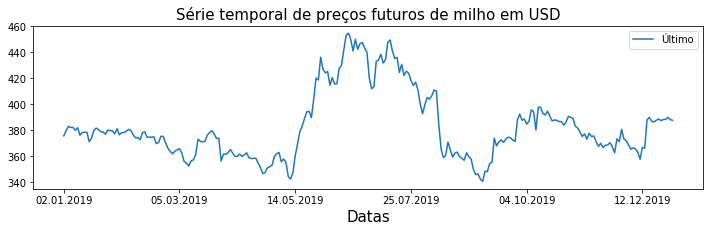

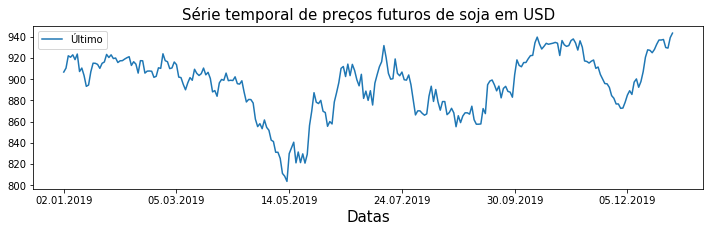

In [13]:
#Vamos agora visualizar as séries temporais
milho.plot(figsize=(12,3))
plt.title('Série temporal de preços futuros de milho em USD',size=15)
plt.xlabel('Datas',size=15)
soja.plot(figsize=(12,3))
plt.title('Série temporal de preços futuros de soja em USD',size=15)
plt.xlabel('Datas',size=15);

In [14]:
#Agora vamos colocar os dados no mesmo dataset
milho['soja']=soja

In [15]:
#Vamos agora só alterar a coluna milho
milho['milho']=milho['Último']
milho=milho.drop(['Último'],axis=1)

#o nome do dataset será milho, não iremos alterá-lo

In [16]:
#Vemos que na coluna soja há 2 valores missing
milho.isna().sum()

soja     2
milho    0
dtype: int64

In [17]:
#Vamos excluir as linhas do dataset com valores missing
milho=milho.dropna(axis=0)

In [18]:
#Vemos que agora não há mais valores missing
milho.isna().sum()

soja     0
milho    0
dtype: int64

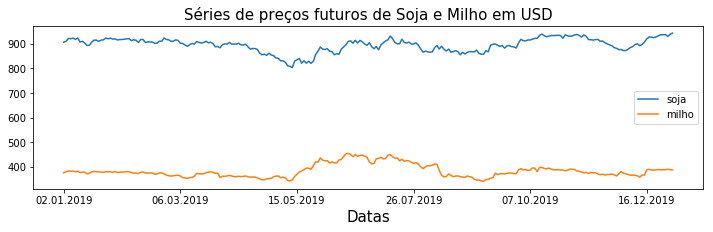

In [20]:
#Vamos plotar novamente as séries em um mesmo gráfico
milho.plot(figsize=(12,3))
plt.xlabel('Datas',size=15)
plt.title('Séries de preços futuros de Soja e Milho em USD',size=15);

In [100]:
#Agora as séries possuem o mesmo número de observações
milho.shape

(262, 2)

In [101]:
#Visualizando o dataset
milho.head()

,soja,milho
Data,,
02.01.2019,906.75,375.75
03.01.2019,910.50,379.75
04.01.2019,922.12,383.00
06.01.2019,920.75,382.25
07.01.2019,923.00,382.25


In [102]:
milho.describe()

,soja,milho
count,262.000000,262.000000
mean,895.754695,383.153626
std,28.244848,25.912661
min,803.500000,340.750000
25%,878.595000,365.000000
50%,900.625000,377.250000
75%,916.437500,390.562500
max,943.500000,454.750000


# Correlação entre as séries

Em toda análise de dados é comum gerar correlação entre as features para observar se elas podem estar seguindo a mesma direção ('caminhando' juntas) ou não.

Abaixo, vemos a tabela de correlação entre as séries temporais e pelos valores gerados a correlação é fraca.

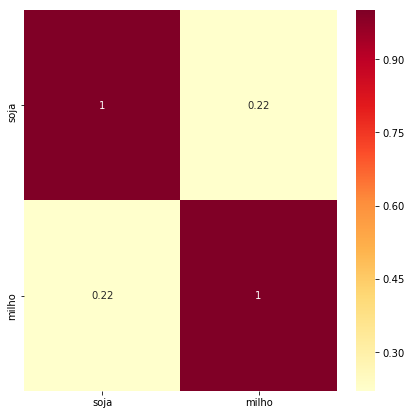

In [22]:
%matplotlib inline
plt.figure(figsize=(7,7))
correlacao2=milho.corr()
sns.heatmap(correlacao2, annot = True,cmap = "YlOrRd");

Porém, em séries temporais, podemos ter um problema de apenas analisar a correlação. Existe um problema chamado de **correlação espúria**, que é quando duas ou mais séries de tempo andam possuem uma correlação alta, mas a sua relação não faz sentido.

Por conta disso foi criado uma outra ferramenta para analisar o "caminhar" junto entre as séries que é o **teste de causalidade de Granger** ou apenas o teste de Granger.

In [217]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    
    milho = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in milho.columns:
        for r in milho.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            milho.loc[r, c] = min_p_value
    milho.columns = [var + '_x' for var in variables]
    milho.index = [var + '_y' for var in variables]
    return milho

grangers_causation_matrix(milho, variables = milho.columns)

#Para esse teste vemos há evidência que soja causa-Granger milho, mas não o contrário.

,soja_x,milho_x
soja_y,1.0000,0.1265
milho_y,0.0059,1.0000


# Teste de estacionariedade

O nosso ponto de partida será o teste de estacionariedade. Se as séries forem estacionárias usaremos um modelo VAR ou um SVAR e se as séries não forem estacionárias poderemos usar um modelo VECM.

Para o teste de esatcionariedade usaremos o teste ADF (**Dickey-Fuller Aumentado**) que tem como hipótese nula que **há a presença de raiz unitária**, ou seja, a série é não estacionária. Se o p-valor for maior que 5% (nível de confiança que usaremos nesse trabalho), então há evidência de que a(s) série(s) são não estacionárias.

**Teste de estacionariedade da série de preços futuros de milho**

O p-valor ficou acima de 5% e a estacística do teste ficou dentro da área de aceitação da hipótese nula, logo concluímos que a série de preços futuros de milho é não estacionária.

In [219]:
print('Estatística do teste Dickey-Fuller:',adfuller(milho['milho'])[0])
print('P-valor:',adfuller(milho['milho'])[1])
print('Defasagens usadas no teste:',adfuller(milho['milho'])[2])
print('Observações usadas:',adfuller(milho['milho'])[3])
print('Valores críticos:',adfuller(milho['milho'])[4])

Estatística do teste Dickey-Fuller: -2.06447667042371
P-valor: 0.2590364403115011
Defasagens usadas no teste: 1
Observações usadas: 260
Valores críticos: {'1%': -3.4557539868570775, '5%': -2.8727214497041422, '10%': -2.572728476331361}


**Teste de estacionariedade da série de preços futuros de soja**

O p-valor ficou acima de 5% e a estacística do teste ficou dentro da área de aceitação da hipótese nula, logo concluímos que a série de preços futuros de soja é não estacionária.

In [220]:
print('Estatística do teste Dickey-Fuller:',adfuller(milho['soja'])[0])
print('P-valor:',adfuller(milho['soja'])[1])
print('Defasagens usadas no teste:',adfuller(milho['soja'])[2])
print('Observações usadas:',adfuller(milho['soja'])[3])
print('Valores críticos:',adfuller(milho['soja'])[4])

Estatística do teste Dickey-Fuller: -2.0672384436686038
P-valor: 0.25789054133970324
Defasagens usadas no teste: 0
Observações usadas: 261
Valores críticos: {'1%': -3.4556556713934934, '5%': -2.872678352489859, '10%': -2.57270548832225}


Temos uma forte evidência de que iremos usar um modelo VECM. Vamos ver se as séries podem ser cointegradas, ou seja, se possuem o mesmo termo de diferenciação. Quando duas séries são cointegradas, elas serão estacionárias com o mesmo número de diferenciações.

Vamos ver primeiro se com uma diferenciação elas se tornam estacionárias.

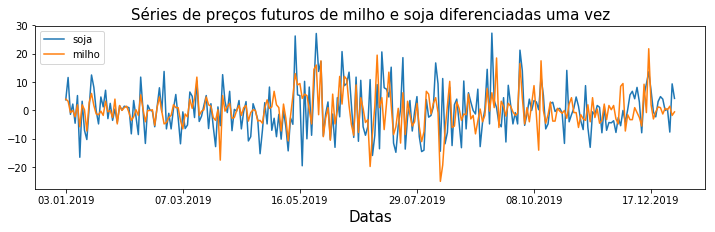

In [25]:
#f=diferenciando as séries apenas uma vez
milho_diff=diff(milho,k_diff=1)
milho_diff.plot(figsize=(12,3))
plt.xlabel('Datas',size=15)
plt.title("Séries de preços futuros de milho e soja diferenciadas uma vez",size=15);

Para a série de preços futuros de milhos a série se tornou estacionário (p-valor menor que 5% e a estatística do teste supera, em módulo, os valores críticos).

In [26]:
print('Estatística do teste Dickey-Fuller:',adfuller(milho_diff['milho'])[0])
print('P-valor:',adfuller(milho_diff['milho'])[1])
print('Defasagens usadas no teste:',adfuller(milho_diff['milho'])[2])
print('Observações usadas:',adfuller(milho_diff['milho'])[3])
print('Valores críticos:',adfuller(milho_diff['milho'])[4])

Estatística do teste Dickey-Fuller: -14.636946875545107
P-valor: 3.6754670437462866e-27
Defasagens usadas no teste: 0
Observações usadas: 260
Valores críticos: {'1%': -3.4557539868570775, '5%': -2.8727214497041422, '10%': -2.572728476331361}


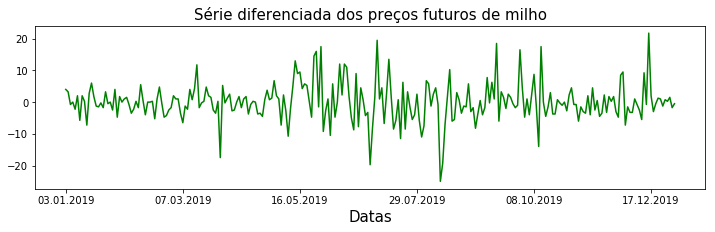

In [28]:
milho_diff['milho'].plot(color='green',figsize=(12,3))
plt.xlabel('Datas',size=15)
plt.title("Série diferenciada dos preços futuros de milho",size=15);

Para a série de preços futuros de soja a série se tornou estacionário (p-valor menor que 5% e a estatística do teste supera, em módulo, os valores críticos).

In [29]:
print('Estatística do teste Dickey-Fuller:',adfuller(milho_diff['soja'])[0])
print('P-valor:',adfuller(milho_diff['soja'])[1])
print('Defasagens usadas no teste:',adfuller(milho_diff['soja'])[2])
print('Observações usadas:',adfuller(milho_diff['soja'])[3])
print('Valores críticos:',adfuller(milho_diff['soja'])[4])

Estatística do teste Dickey-Fuller: -16.681077346367022
P-valor: 1.51620440046385e-29
Defasagens usadas no teste: 0
Observações usadas: 260
Valores críticos: {'1%': -3.4557539868570775, '5%': -2.8727214497041422, '10%': -2.572728476331361}


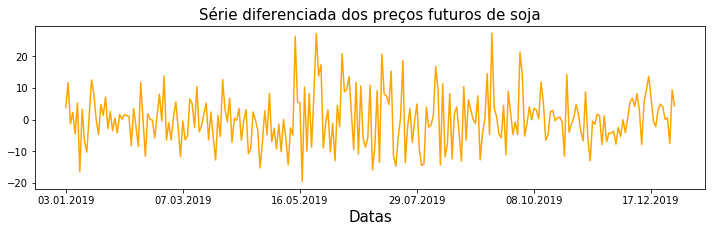

In [31]:
milho_diff['soja'].plot(color='orange',figsize=(12,3))
plt.xlabel('Datas',size=15)
plt.title("Série diferenciada dos preços futuros de soja",size=15);

O que podemos concluir é que as séries de preços futuros de milho e soja sejam cointegrados, mas precisamos fazer o teste de cointegração de Johansen que é mais adequado.

# Teste de cointegração

Aqui iremos usar o teste de cointegração de Johansen. A hipótese nula do teste é que **há pelo menos um vetor de cointegração**. Caso o resultado seja negativo iremos usar um modelo VAR com as séries diferenciadas, mas caso seja positivo seguiremos com o modelo VECM e escolheremos o seu argumentos.

Se o valor do traço (estatística do teste) for maior que o valor crítico, rejeitaremos a hipótese nula. E se rejeitarmos $H_{0}$ usaremos um VAR com primeira diferença.

In [32]:
#em  coint_johansen usarei a base de dados 'milho', no det_order 0 para constant term e k_ar_diff = 1 (número de vezes que as
#séries são diferenciadas até se tornarem estacionária e que vimos que é 1, anteriormente)

# o det_order pode ser (-1 - no deterministic terms,  0 - constant term e 1 - linear trend)
#testamos todos e o resultado permaneceu o mesmo

def cointegration_test(milho, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(milho,0,1)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(milho.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(milho)

#quando o traço é maior que o valor crítico, então podemos rejeitar a hipótese nula (Não há cointegrção) e aceitar a hipótese
#alternativa

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
soja   ::  14.27     > 18.3985   =>   False
milho  ::  3.73      > 3.8415    =>   False


Ao invés de tudo isso acima podemos fazer como abaixo:

In [36]:
print('O valor do Traço é :',coint_johansen(milho,0,1).lr1[0])
print('Os valores crítico a 90%:',coint_johansen(milho,0,1).cvt[0][0])
print('Os valores crítico a 95%:',coint_johansen(milho,0,1).cvt[0][1])
print('Os valores crítico a 99%:',coint_johansen(milho,0,1).cvt[0][2])

print(' '*254)
#para usar a outra estatística Maximum eigenvalue statistic (ao invés do traço) use lr2
# e ao invés de cvt use cvm, como abaixo

print('O valor do Maximum eigenvalue é :',coint_johansen(milho,0,1).lr2[0])
print('Os valores crítico a 90%:',coint_johansen(milho,0,1).cvm[0][0])
print('Os valores crítico a 95%:',coint_johansen(milho,0,1).cvm[0][1])
print('Os valores crítico a 99%:',coint_johansen(milho,0,1).cvm[0][2])

#Vemos que o resultado é o mesmo, a estatística do teste não supera, em módulo, os valores críticos

O valor do Traço é : 14.249631879147351
Os valores crítico a 90%: 13.4294
Os valores crítico a 95%: 15.4943
Os valores crítico a 99%: 19.9349
                                                                                                                                                                                                                                                              
O valor do Maximum eigenvalue é : 10.52632147519948
Os valores crítico a 90%: 12.2971
Os valores crítico a 95%: 14.2639
Os valores crítico a 99%: 18.52


A conclusão que temos é que as séries possuem pelo menos um vetor de cointegração, ou seja, **são cointegradas**.

In [39]:
#vamos apenas redefinir outro dataset com para usarmos no modelo VECM
prices=milho[['milho','soja']]

In [41]:
prices.head()

,milho,soja
Data,,
02.01.2019,375.75,906.75
03.01.2019,379.75,910.50
04.01.2019,383.00,922.12
06.01.2019,382.25,920.75
07.01.2019,382.25,923.00


# Estimação do Modelo VECM

Próxima etapa é encontrar os valores para *k_ar_diff* e o *cointegration rank*.

Geralmente o valor de *k_ar_diff* para o modelo VECM é dado pelo valor de *d* (termo de diferenciação) menos 1 (*d*-1), então no nosso caso seria 0. Vamos então gerar a tabela com os lags ótimos que vamos usar no modelo VECM, que é dado pelo menor critério de informação (que pode ser AIC, BIC, FPE ou HQIC).

Como podemos ver na tabela abaixo o valor foi de 0, como suspeitávamos.

In [44]:
import warnings
warnings.simplefilter("ignore")
lag_order = select_order(data= prices, maxlags=10, deterministic="ci", seasons=0)
lag_order.summary()

# valores definidos pelo menores valor dso critérios de informação, marcados pelo *

,AIC,BIC,FPE,HQIC
0,7.534*,7.646*,1870.*,7.579*
1,7.549,7.717,1898.,7.617
2,7.562,7.787,1924.,7.652
3,7.592,7.873,1982.,7.705
4,7.614,7.951,2026.,7.749
5,7.634,8.027,2068.,7.792
6,7.658,8.108,2118.,7.839
7,7.686,8.192,2179.,7.890
8,7.697,8.259,2204.,7.923
9,7.702,8.320,2216.,7.951


Agora vamos encontrar o número de vetores de cointegração para usarmos no modelo VECM. Abaixo, vemos que valor foi 2 vetores de cointegração.

In [47]:
print('O rank de cointegração usado no modelo VECM é: ',select_coint_rank(prices,det_order=0,k_ar_diff=0,
                                                                         method = 'trace',signif=0.05).rank)

O rank de cointegração usado no modelo VECM é:  2


In [48]:
#Aqui podemos ver o sumário da seleção do rank de contegração
print(select_coint_rank(prices,det_order=0,k_ar_diff=0,method = 'trace',signif=0.05).summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          18.06          15.49
  1   2          4.758          3.841
-------------------------------------


Encontrados os valores do *k_ar_diff* e do *cointegration_rank* vamos gerar o modelo **VECM**

In [63]:
#Vamos instanciar o modelo com o valores

#vamos usar como termo determinístico ci = constant within the cointegration relation
model = VECM(prices, deterministic="ci",k_ar_diff=0, coint_rank=2)

In [64]:
#Vamos agora treinar o modelo
VEC=model.fit()

In [65]:
#Abaixo vamos gerar o sumário com os dados
VEC.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
ec1,-0.0181,0.014,-1.266,0.206,-0.046,0.010
ec2,-0.0365,0.013,-2.766,0.006,-0.062,-0.011
,coef,std err,z,P>|z|,[0.025,0.975]
ec1,0.0222,0.020,1.128,0.259,-0.016,0.061
ec2,-0.0416,0.018,-2.289,0.022,-0.077,-0.006
,coef,std err,z,P>|z|,[0.025,0.975]
beta.1,1.0000,0,0,0.000,1.000,1.000
beta.2,1.508e-17,0,0,0.000,1.51e-17,1.51e-17
const,-381.0752,10.808,-35.259,0.000,-402.258,-359.892
,coef,std err,z,P>|z|,[0.025,0.975]


Observando o sumário pode ver os valores dos termos de correção de erros que, para **ec2** das duas séries, justamente para o valor do *cointegration rank* que foi igual a 2. Os valor dos **ec2's** foram negativos (ou seja, temos convergência para o equilíbrio) e significativo. Como isso concluímos que temos uma relação de longo prazo entre as séries.

# Função Impulso-Resposta

A função impulso-resposta tem como objetivo medir o impacto (choque) da variação de uma variável em modelos do tipo VAR. Com ela é possível perceber como uma variação ocorrida em uma das variáveis do sistema repercute nas demais em um determinado horizonte de tempo.

Observando os resultados abaixo temos:

1) Na diagonal **principal** temos os resultados autorregressivos: Impacto autorregressivo da série de preços futuros de milho nela mesma, esse impacto positivo dura quase 80 períodos (ou 80 dias). O impacto autorregressivo da série de preços futuros de soja nela mesma, também positivo, dura cerca de 40 períodos (ou 40 dias);
   
2) Na diagonal **secundária** encontra-se o resultado que queremos, que é o impacto de uma série na outra: O impacto dos preços futuros de soja na série de preços futuros de milho é **negativo** e dura cerca 120 períodos (120 dias), em outras palavras, a variação do preço futuro da soja afeta negativamente a variação do preço futuro do milho.
Em contrapartida o impacto do preço futuro afeta positivamente a variação do preço futuro de soja por um período menor que 120 dias.



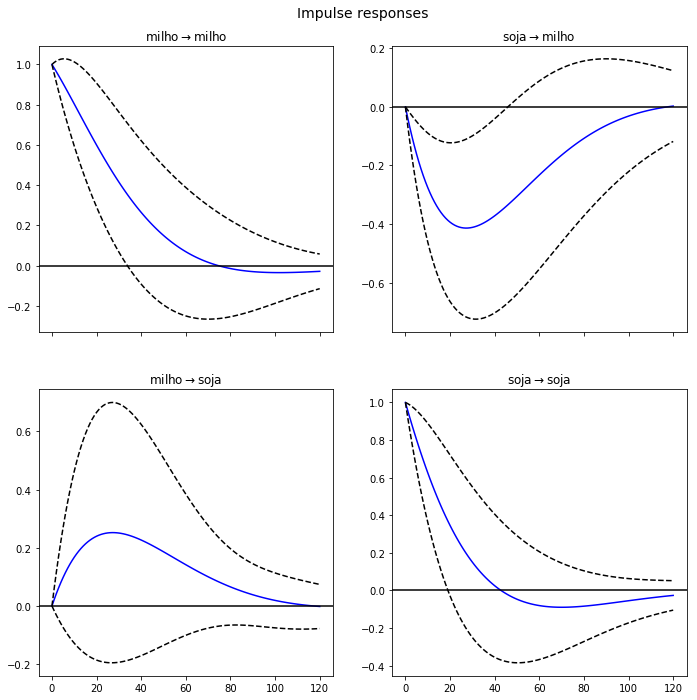

In [67]:
ir = VEC.irf(periods=120)
ir.plot(plot_stderr=True);

#também pode ser usado o códig abaixo para plotar apenas as IR da diagonal secundária:
#ir.plot(impulse='milho', response='soja');
#ir.plot(impulse='soja', response='milho');

# Decomposição da variância

A **decomposição da variância**, revela a proporção da variância do erro de previsão para uma das variáveis que se deve a ela mesma, e às demais. Usando a biblioteca **statsmodels** do Python, usaríamos a função *fevd_table()*, porém ela está gerando um erro de implementação, ou seja, não criaram, ainda, uma função para gerar a decomposição da variância em modelos VECM; e a função *fevd()* usadas em modelos VAR não é reconhecida pelo *VECMResults*.

Por isso não foi gerada a decomposição da variância para esse modelo.

# Teste de causalidade de Granger e causalidade instantânea

O teste de Granger permite saber se uma séries é útil para a previsão de outra série, ou seja, se em uma série há informações relevantes para a previsão da outra. A ideia segue a lógica de que o efeito nunca vem antes da causa, ou seja, se a variável *x* causa *y*, *x* deve ajudar na previsão de *y*.

Abaixo podemos gerar o teste de Granger do modelo VECM que geramos.

Aqui vemos que não rejeitamos a hipótese nula, de que *soja* não causa-Granger *milho* e de *milho* não causa-Granger *soja*.

Observação: o teste causalidade de Granger anterior obteve resultados diferentes desse, provavelmente por ser um teste usado para analisar causalidade entre as colunas da base de dados, aqui o teste é usado com a variáveis dentro do modelo.

In [68]:
display(VEC.test_granger_causality('milho', causing='soja', signif=0.05).summary())
display(VEC.test_granger_causality('soja', causing='milho', signif=0.05).summary())

Test statistic,Critical value,p-value,df
1.362,3.860,0.244,"(1, 510)"


Test statistic,Critical value,p-value,df
3.455,3.860,0.064,"(1, 510)"


O teste de **causalidade instantânea**, trata sobre a capacidade de prever *y*, com base no histórico de todas as variáveis observáveis, é afetada pela omissão do histórico de *x*. Se "x causa y" e "y causa x ”, existe um feedback entre as variáveis.

A hipótese nula de causalidade instantânea é semelhantea a do teste de Granger, $H_0$: *x* não causa instantaneamente *y*.

Aqui já temos um resultado diferente do teste de Granger, pois nós rejeitamos a hipótese nula (p-valores menores que 5% e estatística supera, em módulo, o valor crítico a 5%) de que a série de preços futuros de *milho* causa instantaneamente a série de preços futuros de *soja* e vice-versa.

In [369]:
display(VEC.test_inst_causality(causing="milho").summary())
display(VEC.test_inst_causality(causing="soja").summary())

Test statistic,Critical value,p-value,df
52.16,3.841,0.000,1


Test statistic,Critical value,p-value,df
52.16,3.841,0.000,1


# Diagnóstico dos Resíduos

Essa é uma etapa crucial, pois sem ela não é possível gerarmos as previsões. Uma das garantias de que a série foi bem modelada é que os erros (diferença entre os valores das séries originais e do valor treinado e modelado) possuem uma distribuição normal e para séries temporais, se há autocorrelação nos resíduos.

Vamos testar primeiro a autocorrelação serial usando o teste **Durbin-Watson** e o **teste de Portmanteau**. Uma das evidências de que não há autocorrelação serial é que os valores do teste Durbin-Watson estejam centrados ou mais próximo possível de 2. Valores próximos de 0 indicam autocorrelação positiva e valores próximos de 4 indicam autocorrelação negativa. 

Nos resultados abaixo, vemos que o teste apresentou os valores de 1.8 para os resíduos da série de preços futuros de *milho* e de 2.04 para os resíduos da série de preços futuros de *soja*, o que indica que não há autocorrelação serial.

In [75]:
for col, val in zip(milho.columns, durbin_watson(VEC.resid)):
    print((col), ':', round(val, 6))

soja : 1.804974
milho : 2.045461


Podemos usar também o teste de Portemanteau, cuja hipótese nula é que a autocorrelação dos resíduos é zero, logo é precisamos aceitar $H_0$. Nos resultados abaixo o valor da estatística do teste ficou abaixo no valor críticos em ambos os resíduos das séries de preços, aceitando então $H_0$ (autocorrelação é zero).

In [72]:
white_test = VEC.test_whiteness(nlags=12, adjusted=True)
white_test.summary()

Test statistic,Critical value,p-value,df
44.76,60.48,0.440,44


Por fim vamos testar se os resíduos são normais. O teste usado é o Jarque-Bera que tem como hipótese nula que os dados são gerados por um processo Gaussiano, ou seja, são normais. Aqui precisamos aceitar a hipótese nula, mas como podemos ver abaixo a hipótese nula foi rejeitada, logo os resíduos desse modelo não são normais.

In [73]:
VEC.test_normality().summary()

Test statistic,Critical value,p-value,df
126.8,9.488,0.000,4


In [76]:
# Vamos gerar um dataframe com os dados dos resíduos
residuals = pd.DataFrame(VEC.resid, columns=['milho_resid','soja_resid'])

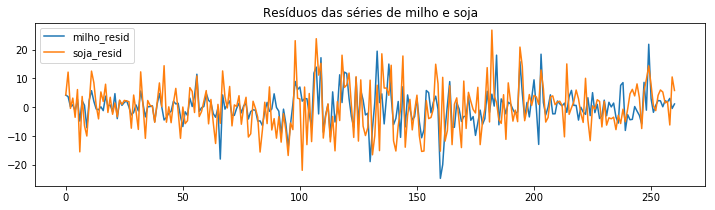

In [82]:
#Vamos visualizar os resíduos de cada série
residuals.plot(figsize=(12,3))
plt.title('Resíduos das séries de milho e soja');

Abaixo podemos ver 3 gráfico: o gráfico com os resíduos da série de preços futuro de milho, a distribuição dos resíduos e o gráfico qqplot.

Observando o gráfico da distribuição dos resíduos de *milho* vemos que os dados parecem estar centrado em 0, mas aparenta ser ter formato leptocúrtico (curtose maior que 3). Já o qqplot apresentou muitos pontos fora na reta vermelha. Ou seja, há uma evidência de que os dados não possuem uma distribuição normal.

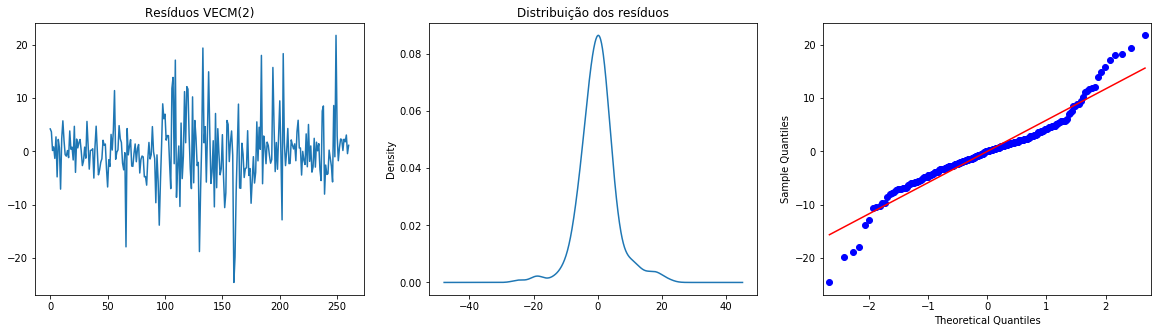

In [80]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
residuals['milho_resid'].plot(title="Resíduos de milho VECM(2)", ax=ax[0])
residuals['milho_resid'].plot(kind='kde', title='Distribuição dos resíduos', ax=ax[1])
qqplot(residuals['milho_resid'],line='s', ax=ax[2]);

Observando o gráfico da distribuição dos resíduos de *soja* vemos que os dados parecem estar centrado em 0 e o formato parece ser de sino, como a uma distribuição normal. O qqplot apresentou muitos pontos em cima na reta vermelha. Já aqui há uma evidência de que os dados possuem uma distribuição normal.

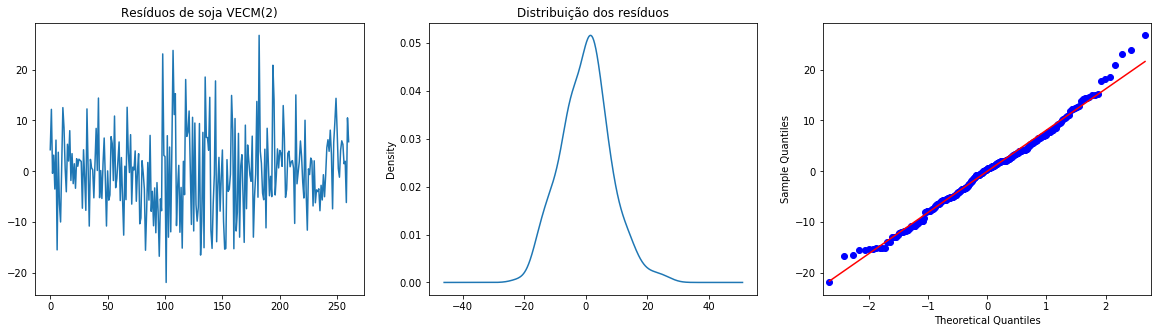

In [83]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
residuals['soja_resid'].plot(title="Resíduos de soja VECM(2)", ax=ax[0])
residuals['soja_resid'].plot(kind='kde', title='Distribuição dos resíduos', ax=ax[1])
qqplot(residuals['soja_resid'],line='s', ax=ax[2]);

Para tirarmos nossas dúvidas, vamos fazer um teste Jarque-Bera para cada um dos resíduos de cada série. O primeiro será com os resíduos da série de preços futuros de milho. Obtemos que o p-valor é menor que 5%, ou seja, rejeitamos a hipótese nula de normalidade. Note que a assimetria é próxima de zero, mas a curtose é maior que 3, o corrobora com o que falamos anteriormente, sobre a distribuição ser leptocúrtica.

In [86]:
print(' '*254)
test1 = jarque_bera(residuals['milho_resid'])
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

#p-valor menor que 0.05

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 111.35862332905467
P-valor : 6.588433820962423e-25
Assimetria : 0.14539706490154275
Curtose : 6.18674005586278


Para os resíduos da série de preços futuros de soja: o p-valor ficou acima de 5%, a assimetria ficou próxima de zero e a curtose próxima de 3. Conclusão: resíduos normais.

In [87]:
print(' '*254)
test2 = jarque_bera(residuals['soja_resid'])
print('Estatística Jarque-Bera :', test2[0])
print('P-valor :', test2[1])
print('Assimetria :', test2[2])
print('Curtose :',test2[3])

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 3.158899863417995
P-valor : 0.20608842974232708
Assimetria : 0.2290220616546933
Curtose : 3.2840231183563433


Concluímos que não podemos gerar previsões para a série de preços futuros de milho, mas podemos gerar previsões para os preços futuros de soja.

# Avaliação do modelo

Aqui vamos separar os dados em treino (uma parte para o modelo) e teste (uma parte que o modelo não "verá"). Com isso vamos avaliar o desempenho do modelo treinando-o com os dados de *treino* e comparando as previsões que geraremos dele com os dados de *teste*.

In [88]:
#Separando os dados de treino e teste: vamos dividir em 80% para treino e 20% para teste

#dados de treino
treino=prices.iloc[:-52]

#dados de teste
teste=prices.iloc[-52:]

#dimensão das bases de treino e teste
print(treino.shape,teste.shape)

(210, 2) (52, 2)


In [91]:
#Vamos treinar novamente o mesmo modelo, mas apenas com os dados de treino
model = VECM(treino, deterministic="ci",k_ar_diff=0, coint_rank=2)
VEC2=model.fit()

In [92]:
#Vamos criar as previsões em um dataframe
start=len(treino)
end=len(treino) + len(teste) - 1

#geramos um total de 52 previsões, mesmo número de previsões 
previsoes = pd.DataFrame(VEC2.predict(52),columns=['milho_pred','soja_pred'],index=teste.index)

In [93]:
#inserir as previsões no mesmo dataset prices
prices[['prev_milho','prev_soja']]=previsoes

In [94]:
#Podemos ver a base de dados
prices.tail()

,milho,soja,prev_milho,prev_soja
Data,,,,
25.12.2019,388.25,937.00,370.510850,890.357541
26.12.2019,388.50,937.50,370.793877,890.174712
27.12.2019,390.00,929.88,371.081178,890.007855
30.12.2019,388.25,939.25,371.371975,889.856270
31.12.2019,387.75,943.50,371.665533,889.719272


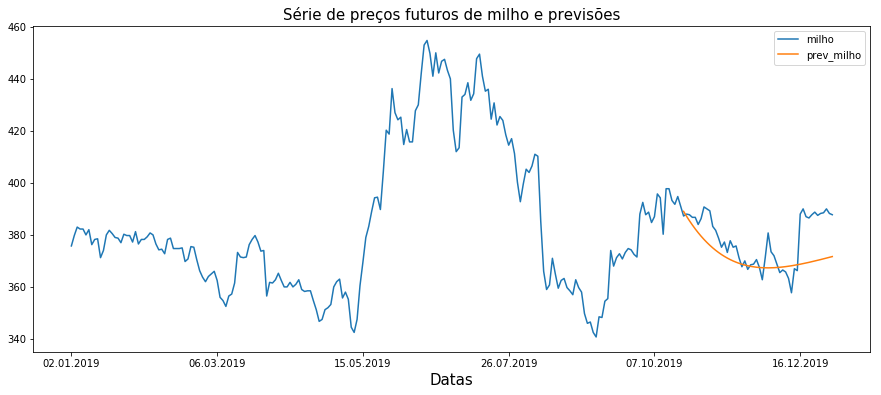

In [96]:
#Vamos plotar as previsões com a série de total
prices[['milho','prev_milho']].plot(figsize=(15,6))
plt.xlabel('Datas',size=15)
plt.title('Série de preços futuros de milho e previsões',size=15);

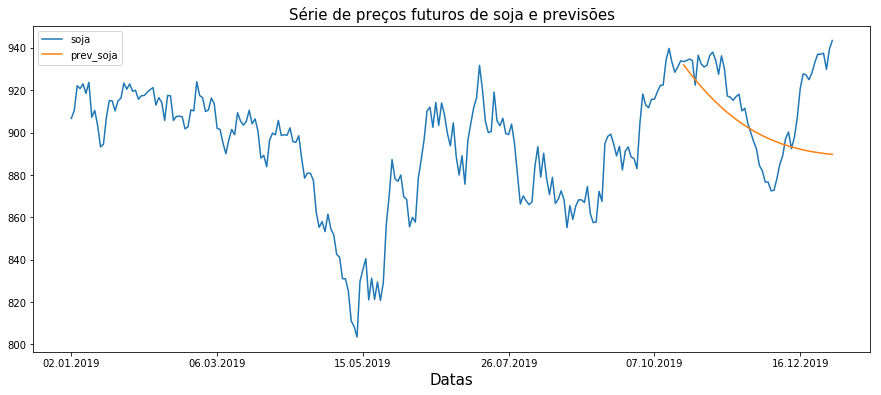

In [97]:
prices[['soja','prev_soja']].plot(figsize=(15,6))
plt.xlabel('Datas',size=15)
plt.title('Série de preços futuros de soja e previsões',size=15);

In [98]:
#comparando a média das previsões com a média de teste
print(previsoes.mean())
print(teste.mean())

#podemos observar que as médias são bem semelhantes

milho_pred    371.800555
soja_pred     903.554760
dtype: float64
milho    378.177885
soja     915.196923
dtype: float64


In [104]:
milho.describe()

,soja,milho
count,262.000000,262.000000
mean,895.754695,383.153626
std,28.244848,25.912661
min,803.500000,340.750000
25%,878.595000,365.000000
50%,900.625000,377.250000
75%,916.437500,390.562500
max,943.500000,454.750000


In [99]:
#Calculando as métricas de avaliação RMSE e MAE da série de preços futuros de milho
print(rmse(previsoes['milho_pred'],teste['milho']))
print(mean_absolute_error(previsoes['milho_pred'],teste['milho']))

#O RMSE e o MAE tiveram valores pequenos

10.082442490849008
7.632821163849568


In [358]:
#Calculando as métricas de avaliação RMSE e MAE da série de preços futuros de milho
print(rmse(previsoes['soja_pred'],teste['soja']))
print(mean_absolute_error(previsoes['soja_pred'],teste['soja']))

23.28680188074295
18.21873294527128


# Previsão

Aqui chegamos na última etapa que a geração de previsões. Nesse caso estamos gerando previsões para um horizonte de tempo que não conhecemos, diferente da avaliação, onde os valores de teste existem para compararmos com as métricas. Já havíamos falado anteriormente que não poderíamos gerar previsões para modelos que não passam na etapa de diagnóstico dos resíduos, entretanto vamos apenas gerá-las e plotá-las para fins didáticos.

In [106]:
#gerando as previsões por cerca de 60 períodos
prev_vec=VEC.predict(60)

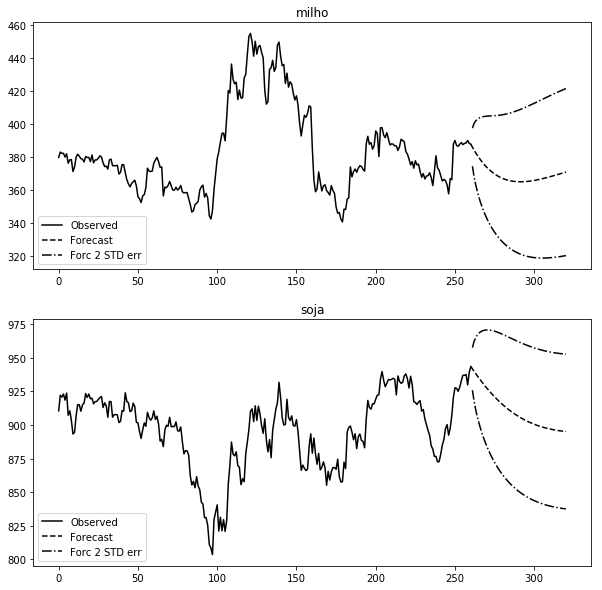

In [107]:
#plotando as previsões com as séries de preços futuros
VEC.plot_forecast(60,plot_conf_int=True)

#caso não queira plotar as previsões com os intervalos de confiança, basta trocar o 'True' por 'False'.

# Conclusão

O obejtivo desse trabalho é **apresentar** outras alternativas para se trabalhar com modelos de séries temporais, além do método univariado (ARIMA) que foi apresentado [aqui](https://github.com/IvanildoBatista/Series-Temporais/blob/master/Modelagem%20Box-Jenkins%20em%20Python.ipynb). Apresentamos as etapas e como devem ser efetuadas, geramos resultados com as funções impulso-resposta para entender o comportamento das séries de tempo utilizadas e como elas relacionam-se no longo prazo, e por fim, geramos as previsões (novamente explicando que foram geradas para fins de didáticos e de apresentação).